# Convolutional Neural Network (CNN)

#### Source Link: https://www.tensorflow.org/tutorials/images/cnn
##### CIFAR-10 dataset : https://www.cs.toronto.edu/%7Ekriz/cifar.html

##### CNN working way / Explaination: https://poloclub.github.io/cnn-explainer/
##### Youtuber Explaination: https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=24

### Check tensorflow installed in your machine

In [ ]:
# Before start doing tensorflow, need to install using following commands, if you installed already, then ignore
# ! pip install tensorflow 
# Above line will install tensorflow into our directory

### Import Required Libiraries

In [1]:
# import tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Import tensorflows datasets, layers, models
from tensorflow.keras import datasets, layers, models

# import numpy as np and pandas as pd and matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download and prepare the CIFAR10 dataset
###### The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#### Check samples

In [3]:
print('train_images.shape : ', train_images.shape)
print('test_images.shape : ', test_images.shape)

print ('train_images [0] : \n',  train_images[0])


train_images.shape :  (50000, 32, 32, 3)
test_images.shape :  (10000, 32, 32, 3)
train_images [0] : 
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


#### Visual some images

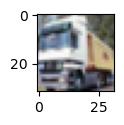

In [4]:
plt.figure(figsize=(10,1))
plt.imshow(train_images[1])

In [5]:
# Class Values
# Check order of the data set labels in CIFAR-10 dataset page / link in : https://www.cs.toronto.edu/%7Ekriz/cifar.html
class_name = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


In [6]:
# create function to itrade / display impage with labels
def output_samples(image, label, index):
    # set o/p image size
    plt.figure(figsize= (15,2))

    # show image
    plt.imshow(image[index])

    # show label,
    plt.xlabel(class_name[label[index][0]])

    plt.show()

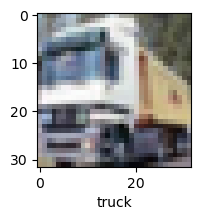

In [7]:
output_samples(train_images, train_labels, 1)

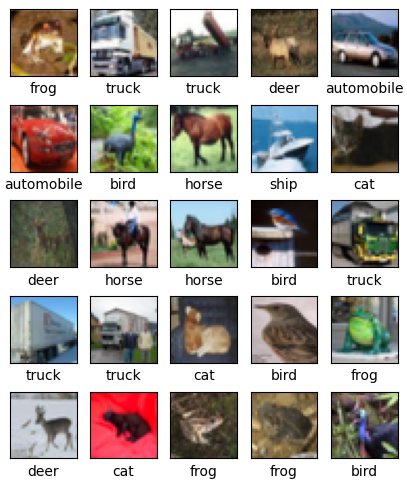

In [8]:
# Check order of the data set labels in CIFAR-10 dataset page / link in : https://www.cs.toronto.edu/%7Ekriz/cifar.html

#  first set image size to display
plt.figure(figsize=(5, 6))

# Itrate loop to print in console first 25 images alone
for i in range(25):
    # subplot in 5 pics in a row
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # display images
    plt.imshow(train_images[i])

    # note: The CIFAR labels are in array 2D
    # So we are adding extra index with 0
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()


### normalise the Pixl values 
###### # Normalize pixel values to be between 0 and 1 as CIFAR-10 dataset have pixel vales b/w 0.00 to 255.00

In [9]:
train_images, test_images = train_images / 255.00, test_images/255.00

## Model Creation with ANN

#### Frist trying ANN alone without using CNN

In [10]:
# Step 1: Create a Sequential model, (Stack of layer in neural n/w - since it's stach, every layer is 1 element )
model = keras.Sequential([
    # Ste 2: Flattern x_train vlues (convert 2d to 1d by using flatten)
    keras.layers.Flatten(input_shape = (32,32,3) ),
    
    # Step 2: Add hidden Layer 1 with the output layer a n neurons, and activation function
    keras.layers.Dense(
        3000, # Output layers for 1st hidden layer (Note: for first layer no need for input layer size, it will assign on it's own)
        activation = 'relu' # activation type
    ), 
    keras.layers.Dense(
        1000, # Output layers for 1st hidden layer (Note: for first layer no need for input layer size, it will assign on it's own)
        activation = 'relu' # activation type
    ), 

    # Step 3: Add the output layer with 10 neurons (one for each digit), and activation function
    keras.layers.Dense(
        10, # Output layers for last hidden layer o/p (Note: for first layer no need for input layer size, it will assign on it's own)
        activation = 'sigmoid' # activation type
    )
])

# Complile that neural n/w
model.compile(
    optimizer = "SGD",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

# fit into model (epochs=5 means  it will ittrate 5 times)
model.fit(train_images, train_labels, epochs=5)

C:\Users\Mohan Govindasamy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3052 - loss: 1.9314
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4237 - loss: 1.6376
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4574 - loss: 1.5457
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4780 - loss: 1.4823
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 34ms/step - accuracy: 0.4938 - loss: 1.4371


##### Evaluate ANN Model

In [11]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4948 - loss: 1.4242


[1.4349440336227417, 0.4869000017642975]

##### Predict with test

In [12]:
# predict test samples with our model
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


##### Visuals

First 5 prect values is:
 [3, 9, 8, 8, 4]
First 5 actual values is:
 [[3]
 [8]
 [8]
 [0]
 [6]]

Confusion Matrix is:
 tf.Tensor(
[[478  21  87  43  13  10  30  35 233  50]
 [ 30 482  27  39   9  18  20  31  98 246]
 [ 74  23 430 130  60  49 126  47  40  21]
 [ 21  11 103 477  27 114 115  34  41  57]
 [ 50   9 256  93 288  29 155  65  37  18]
 [ 16   9 130 317  35 288  89  51  41  24]
 [  5   6 102 155  43  26 603  19  22  19]
 [ 40  12  90 106  57  59  46 492  25  73]
 [ 58  39  18  45  18  10  13  14 721  64]
 [ 32 106  15  56  12  16  28  37  88 610]], shape=(10, 10), dtype=int32)


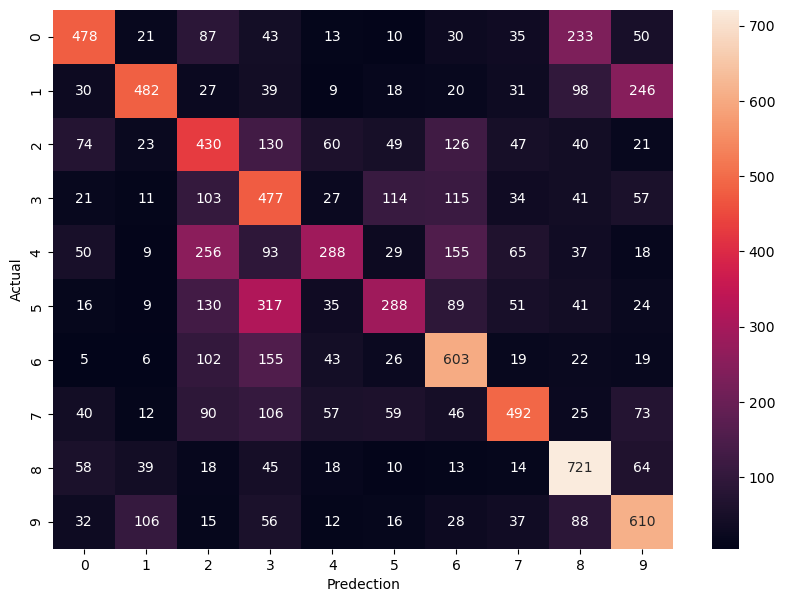

In [13]:
# Confution matrix values
# First convert y_pred values to 1D with correct predection values
y_pred_label = [np.argmax(i) for i in y_pred] # this line will ittreate and store prection value into new array
print("First 5 prect values is:\n", y_pred_label[:5])

# now print actual values
print("First 5 actual values is:\n", test_labels[:5])

# now check with confusion matrics with y_test & y_pred_label
confusion_metrics = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_label)
print("\nConfusion Matrix is:\n", confusion_metrics)

# Display in visuvalisation
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_metrics, annot=True, fmt= 'd')
plt.xlabel("Predection")
plt.ylabel("Actual")
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
# predict test samples with our model
y_pred = model.predict(test_images)
# classes
y_pred_classes = [np.argmax(element) for element in y_pred]

print('\nClassification Report : \n', classification_report(test_labels, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.48      0.53      1000
           1       0.67      0.48      0.56      1000
           2       0.34      0.43      0.38      1000
           3       0.33      0.48      0.39      1000
           4       0.51      0.29      0.37      1000
           5       0.47      0.29      0.36      1000
           6       0.49      0.60      0.54      1000
           7       0.60      0.49      0.54      1000
           8       0.54      0.72      0.61      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



## Model Creation with CNN

### Create Sequential Model for CNN with layer

In [15]:
model = models.Sequential([
    # First crate CNN Layers 1, inital layers (note : imput shape , 3 say RGB for colored image)
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    # Max Pooling
    keras.layers.MaxPooling2D(2,2),

    # add 2nd layer of CNN
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # Max Pooling
    keras.layers.MaxPooling2D(2,2),

    # Dense layers on top
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    # Dense output layer
    keras.layers.Dense(10, activation='softmax'),

])

model.summary()

C:\Users\Mohan Govindasamy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile model

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Fit into model with our data set

In [17]:
model.fit(train_images, train_labels, epochs = 10)
model.summary()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.4000 - loss: 1.6598
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6065 - loss: 1.1210
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6628 - loss: 0.9687
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6936 - loss: 0.8785
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7249 - loss: 0.8023
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7364 - loss: 0.7588
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7528 - loss: 0.7093
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7680 - loss: 0.6680
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7842 - loss: 0.6194
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7987 - loss: 0.5791


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

#### Evaluate model

In [18]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7032 - loss: 0.9149


[0.9270522594451904, 0.7002999782562256]

#### Predict values

Acutal Image of index[1]


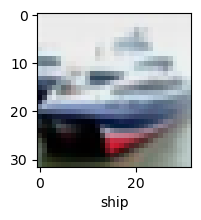

None


In [19]:
# index of the values to get details
i = 1
# Reshape 2D to 1D
y_test = test_labels.reshape(-1,)
y_test[:5]

# print / show images
print(f'Acutal Image of index[{i}]')
print(output_samples(test_images, test_labels, i))



In [20]:
# predict values
pred = model.predict(test_images)
pred[:5]

# using arg max
np.argmax(pred[1])

pred_classes = [np.argmax(element) for element in pred]
print('\nPredected values of first 5 values are : \n', pred_classes[:5] )

print('\nActual values of first 5 values are : \n', y_test[:5] )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Predected values of first 5 values are : 
 [3, 1, 1, 8, 6]

Actual values of first 5 values are : 
 [3 8 8 0 6]


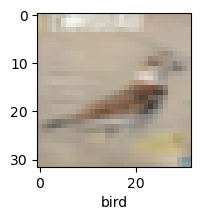

In [32]:
output_samples(test_images, test_labels, 70)

In [33]:
class_name[pred_classes[70]]

'bird'

In [23]:
from sklearn.metrics import classification_report
print('\nClassification Report: \n', classification_report(y_test, pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.67      0.73      1000
           1       0.84      0.81      0.82      1000
           2       0.64      0.58      0.61      1000
           3       0.55      0.46      0.50      1000
           4       0.71      0.59      0.64      1000
           5       0.52      0.72      0.60      1000
           6       0.80      0.73      0.76      1000
           7       0.75      0.75      0.75      1000
           8       0.73      0.86      0.79      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

